In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

import sys
import os.path as osp

SRC_SUBDIR = '../src/'
SRC_SUBDIR = osp.abspath(SRC_SUBDIR)
if SRC_SUBDIR not in sys.path:
    sys.path.insert(1, SRC_SUBDIR)


In [2]:
df = pd.read_csv("../data/processed/features_dataset.csv")

### Boxplot Analysis: Yoga

In [3]:
# lets examine mood on day after yoga vs no yoga days
df_box = df[['Record_Date','value', 'Yoga_lag1']].dropna()

#map to labels for nicer x-axis
df_box['Yoga_Yesterday'] = df_box['Yoga_lag1'].map({0: 'No Yoga', 1: 'Yoga'})

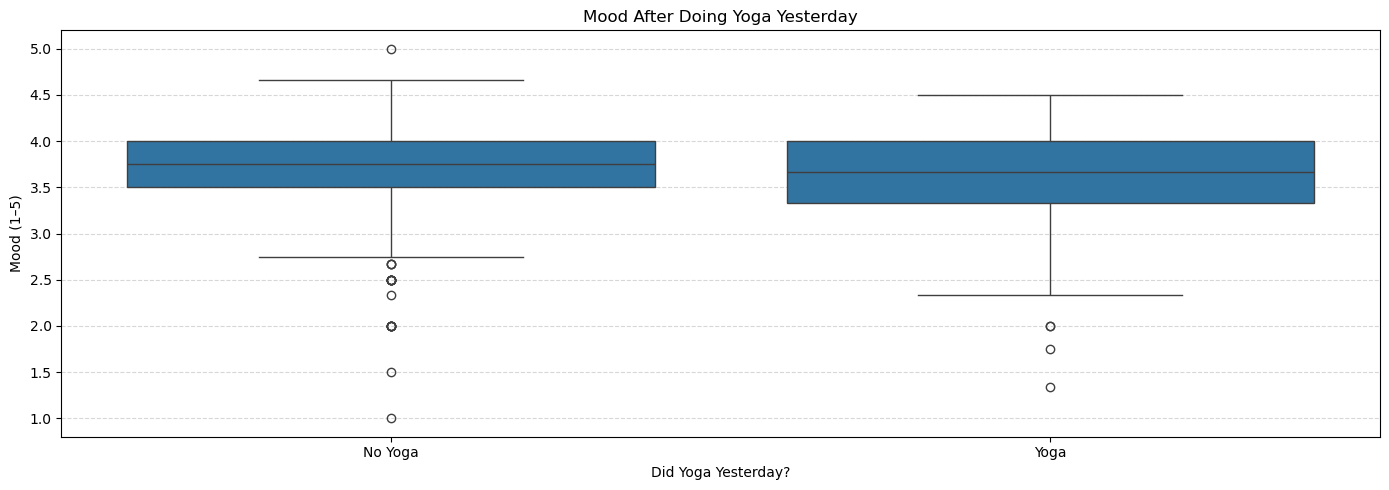

In [4]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='Yoga_Yesterday', y='value', data=df_box)
plt.title("Mood After Doing Yoga Yesterday")
plt.xlabel("Did Yoga Yesterday?")
plt.ylabel("Mood (1–5)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* there appear to be less outliers in mood on days after doing yoga
* the median mood is very similar in both types of days, perhapas slightly lower in yoga days, which could be due to confounding variables (e.g. doing yoga BECAUSE of feeling down)
* I want to start tracking yoga in 2 categories in the future, to see if there's further difference between mood after Restorative Yoga and mood after Intense Yoga

### Boxplot Analysis: Mindfulness Walks

In [5]:
# lets examine mood on mindful walk days vs no mindful walk days
df_walk_box = df[['Record_Date','value', 'Mindfulness Walk']].dropna()

#map to labels for nicer x-axis
df_walk_box['Walk'] = df_walk_box['Mindfulness Walk'].map({0: 'No Walk', 1: 'Walk'})

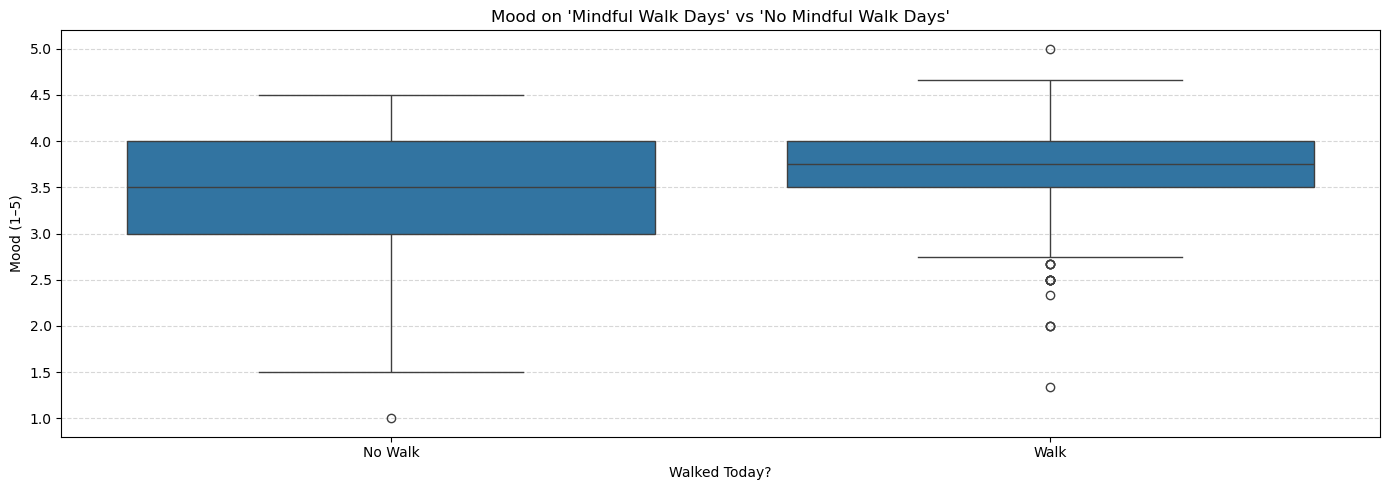

In [6]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='Walk', y='value', data=df_walk_box)
plt.title("Mood on 'Mindful Walk Days' vs 'No Mindful Walk Days'")
plt.xlabel("Walked Today?")
plt.ylabel("Mood (1–5)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Walk Days:
* Higher median mood
* Tighter IQR (suggests more regulated mood)
* More high-end outliers (but even the low outliers don’t dip as low as on no-walk days)

No Walk Days:
* Lower median mood
* Wider IQR (mood more unpredictable)
* Very low outliers (the lowest mood ratings seem to happen on no-walk days)

### Boxplot Analysis: Day After Eating Meals Mood

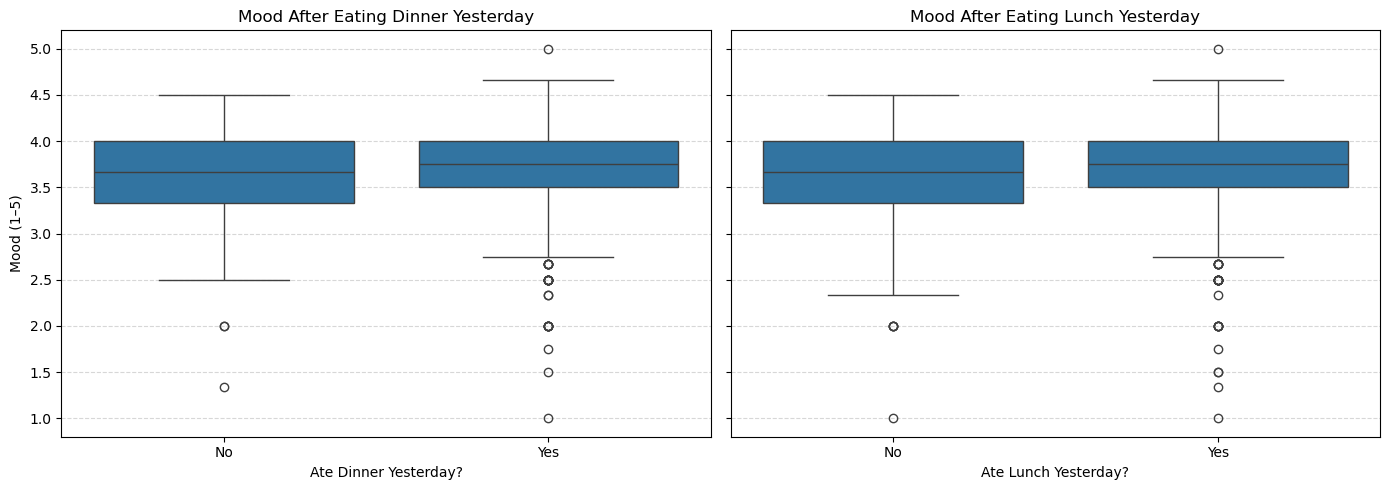

In [7]:
df_box_dinner = df[['Record_Date', 'value', 'Eat Dinner_lag1']].dropna()
df_box_lunch = df[['Record_Date', 'value', 'Eat Lunch_lag1']].dropna()

df_box_dinner['Record_Date'] = pd.to_datetime(df_box_dinner['Record_Date'])
df_box_lunch['Record_Date'] = pd.to_datetime(df_box_lunch['Record_Date'])

df_box_dinner['Eat Dinner_lag1'] = df_box_dinner['Eat Dinner_lag1'].map({0: 'No', 1: 'Yes'})
df_box_lunch['Eat Lunch_lag1'] = df_box_lunch['Eat Lunch_lag1'].map({0: 'No', 1: 'Yes'})

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Dinner Lag boxplot
sns.boxplot(ax=axes[0], x='Eat Dinner_lag1', y='value', data=df_box_dinner, order=['No', 'Yes'])
axes[0].set_title("Mood After Eating Dinner Yesterday")
axes[0].set_xlabel("Ate Dinner Yesterday?")
axes[0].set_ylabel("Mood (1–5)")
axes[0].grid(True, axis='y', linestyle='--', alpha=0.5)

# Lunch Lag boxplot
sns.boxplot(ax=axes[1], x='Eat Lunch_lag1', y='value', data=df_box_lunch, order=['No', 'Yes'])
axes[1].set_title("Mood After Eating Lunch Yesterday")
axes[1].set_xlabel("Ate Lunch Yesterday?")
axes[1].set_ylabel("")
axes[1].grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()